## CA 3, LLMs Spring 2024

- **Name:** Ali Keramati
- **Student ID:** 810198519

---
### This is due on **May 11th, 2024**, submitted via [elearn](https://elearn.ut.ac.ir/).
#### Your submission should be named using the following format: `CA3_LASTNAME_STUDENTID.ipynb`.

---

##### *How to do this problem set:*

- Some questions require writing Python code and computing results, and the rest of them have written answers. For coding problems, you will have to fill out all code blocks that say `WRITE YOUR CODE HERE`.

- For text-based answers, you should replace the text that says "Write your answer here..." with your actual answer.

- There is no penalty for using AI assistance on this homework as long as you fully disclose it in the final cell of this notebook (this includes storing any prompts that you feed to large language models). That said, anyone caught using AI assistance without proper disclosure will receive a zero on the assignment (we have several automatic tools to detect such cases). We're literally allowing you to use it with no limitations, so there is no reason to lie!

---

##### *Academic honesty*

- We will audit the Colab notebooks from a set number of students, chosen at random. The audits will check that the code you wrote actually generates the answers in your notebook. If you turn in correct answers on your notebook without code that actually generates those answers, we will consider this a serious case of cheating.

- We will also run automatic checks of Colab notebooks for plagiarism. Copying code from others is also considered a serious case of cheating.

---

# Chain-of-Thought (CoT) (20 points)

If you have any further questions or concerns, contact the TA via email: mehdimohajeri@ut.ac.ir

LLMs have demonstrated good reasoning abilities. Furthermore, their capabilities can be further improved by incorporating reasoning techniques. One of the most notable developments in this area is the [Chain-of-Thought (CoT)](https://arxiv.org/abs/2201.11903), which was introduced by Google. This approach has shown promising results in improving the reasoning capabilities of language models across a variety of tasks. Can you explain what CoT is and how it works? (2.5 Points)


According to the article, CoT is a method used to improve the reasoning abilities of large language models.  It works by providing the model with a few examples of intermediate reasoning steps, which helps the model to learn how to reason through problems on its own and break down complex problems into smaller, more manageable parts.

In this example I'll show how CoT works:

Given the question: "If there are 10 apples and you take away 3, how many apples are left?"

- Without CoT the answer is: "7 apples."

- However, with the CoT approach, the model is trained to generate an explicit chain of reasoning steps, such as:
"There are 10 apples initially.
You take away 3 apples.
So, 10 - 3 = 7.
Therefore, the number of apples left is 7."

By generating these intermediate reasoning steps, the model is encouraged to break down the problem and follow a logical thought process.

In this section, you should use the CoT technique. firstly you need to load the [Phi-2 model](https://www.microsoft.com/en-us/research/blog/phi-2-the-surprising-power-of-small-language-models/). This model has been introduced by Microsoft as a small LLM

In [44]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

torch.set_default_device("cuda")

model = AutoModelForCausalLM.from_pretrained("microsoft/phi-2", torch_dtype="auto", trust_remote_code=True)
tokenizer = AutoTokenizer.from_pretrained("microsoft/phi-2", trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/35.7k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/564M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
def generate_output(model, input, max_length=300):
  input = f"Question: {input}\nOutput:"
  input = tokenizer(input, return_tensors="pt", return_attention_mask=False)
  outputs = model.generate(**input, max_length=max_length)

  text = tokenizer.batch_decode(outputs)[0]
  return text

Use Phi-2 to answer the questions below with and without CoT. Compare results and explain their difference. (4 Points)

In [ ]:
questions = ["Weng earns $12 an hour for babysitting. Yesterday, she just did 50 minutes of babysitting. How much did she earn?",
"Jack is stranded on a desert island. He wants some salt to season his fish. He collects 2 liters of seawater in an old bucket. If the water is 20% salt, how many ml of salt will Jack get when all the water evaporates?",
"John volunteers at a shelter twice a month for 3 hours at a time. How many hours does he volunteer per year?",
"There are 32 tables in a hall. Half the tables have 2 chairs each, 5 have 3 chairs each and the rest have 4 chairs each. How many chairs in total are in the hall?",
"Bert fills out the daily crossword puzzle in the newspaper every day. He uses up a pencil to fill out the puzzles every two weeks. On average, it takes him 1050 words to use up a pencil. How many words are in each crossword puzzle on average?"
]

In [ ]:
# Without CoT
answers_without_cot = [generate_output(model, q) for q in questions]

print("Answers without CoT:")
for output in answers_without_cot:
    print(output)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Answers without CoT:
Question: Weng earns $12 an hour for babysitting. Yesterday, she just did 50 minutes of babysitting. How much did she earn?
Output: Weng earned $9 for her babysitting job.
<|endoftext|>
Question: Jack is stranded on a desert island. He wants some salt to season his fish. He collects 2 liters of seawater in an old bucket. If the water is 20% salt, how many ml of salt will Jack get when all the water evaporates?
Output: To find the amount of salt in the seawater, we need to multiply the volume of the water by the percentage of salt.

Amount of salt = 2 L x 20% = 0.4 L

To convert liters to milliliters, we need to multiply by 1000.

Amount of salt = 0.4 L x 1000 = 400 ml

Jack will get 400 ml of salt when all the water evaporates.
<|endoftext|>
Question: John volunteers at a shelter twice a month for 3 hours at a time. How many hours does he volunteer per year?
Output: John volunteers 108 hours per year.
<|endoftext|>
Question: There are 32 tables in a hall. Half the 

In [ ]:
# Zero-shot CoT
answers_zeroshot_cot = [generate_output(model, q + " Let's think step by step.") for q in questions]

print("Answers with zero-shot CoT:")
for output in answers_zeroshot_cot:
    print(output)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Answers with zero-shot CoT:
Question: Weng earns $12 an hour for babysitting. Yesterday, she just did 50 minutes of babysitting. How much did she earn? Let's think step by step.
Output: To find out how much Weng earned, we need to convert the 50 minutes into hours. Since there are 60 minutes in an hour, we divide 50 by 60 to get the decimal equivalent. 50/60 = 0.83. Now, we can multiply the decimal by Weng's hourly rate of $12. 0.83 x 12 = $9.96. Therefore, Weng earned $9.96 for babysitting.
<|endoftext|>
Question: Jack is stranded on a desert island. He wants some salt to season his fish. He collects 2 liters of seawater in an old bucket. If the water is 20% salt, how many ml of salt will Jack get when all the water evaporates? Let's think step by step.
Output: To find the amount of salt in the seawater, we need to multiply the volume of water by the percentage of salt. So, 2 liters x 20% = 0.4 liters of salt. To convert liters to milliliters, we need to multiply by 1000. So, 0.4 lite

> For the first question, we can see that Zero-shot CoT helped the model to break down the problem and solve it step by step, whereas the zero-shot approach didn't break down the problem and answered it directly, which led to a wrong answer.

> For the second question, Interestingly, both approaches gave the correct answer and the zero-shot approach without CoT has also resulted in a CoT style answer. This is likely because the content of the question was longer than the other questions (like the fifth question), and the requirement for an answer in mililiters likely led the model to solve it in two steps.

> For the third question, both approaches provided incorrect answers. Interestingly, the zero-shot model without CoT arrived at the same wrong answer as the zero-shot model with CoT, but their reasoning and steps were entirely wrong. It seems like a coincidental match. According to Appendix D.2, the zero-shot with CoT's mistake falls under the "One step missing error" category. It likely failed to consider that the 3 hours applied to each work period. This was probably a difficult question. LLMs might struggle with interpreting such contextual nuances. I asked the question from GPT, and even GPT provided an incorrect answer.

> For the fourth question, zero-shot CoT guided the model towards the correct answer by breaking down the problem step by step. In contrast, the zero-shot approach without CoT made a mistake during the calculation for the number of tables with three chairs. It incorrectly multiplied 5 by 3.

> For the fifth question, zero-shot CoT guided the model towards the correct answer by breaking down the problem step by step. In contrast, the zero-shot approach without CoT gave the wrong answer.

In general we can say that:
- The CoT method helps in identifying and correcting errors.
- The answers with CoT are consistent in their approach, applying the same step-by-step method to each question
- The reasoning steps with CoT provide insights into how the model arrived at the solution, making it easier to understand and evaluate the model's thought process.

## Other Methods for Reasoning

There are many other approaches to utilize the reasoning abilities of LLMs. Describe the [Tree-of-Thought (ToT)](https://arxiv.org/abs/2305.10601) and [Self-Consistency](https://arxiv.org/abs/2203.11171) within these approaches. (3.5 Points)

> **Self-Consistency** replaces the greedy
decoding strategy used in CoT prompting and improves its reasoning process. It  leverages the
intuition that complex reasoning tasks typically admit multiple reasoning paths that reach a correct answer. After generating multiple reasoning paths, it selects the most consistent answer by marginalizing out the sampled reasoning paths. In this way, the model can explore different perspectives and select the most consistent answer, which often leads to more accurate results.

> **Tree-of-Thought (ToT)** generalizes over the CoT prompting and encourages exploration over thoughts that serve as intermediate steps for general problem solving with language models.  Unlike the CoT, which follows a linear, left-to-right decision-making process, ToT allows for exploration over coherent units of text, referred to as “thoughts”, that serve as intermediate steps toward problem solving.


Now, implement Self-Consistency to answer the questions of the previous section. (6 Points)

In [ ]:
def generate_output_selfconsistency(model, input, max_length=300):
  input = f"Question: {input}Let's think step by step. \nOutput:"
  input = tokenizer(input, return_tensors="pt", return_attention_mask=False)
  outputs = model.generate(**input, max_length=max_length, temperature=0.5,do_sample=True)

  text = tokenizer.batch_decode(outputs)[0]
  return text

In [ ]:
answers_with_selfconsistency = [generate_output_selfconsistency(model, questions[0]) for q in range(20)]

print("Answers with Self-Consistency:")
for output in answers_with_selfconsistency:
    print("-------------------START OF THE ANSWER------------------")
    print(output)
    print("-------------------END OF THE ANSWER------------------")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Answers with Self-Consistency:
-------------------START OF THE ANSWER------------------
Question: Weng earns $12 an hour for babysitting. Yesterday, she just did 50 minutes of babysitting. How much did she earn?Let's think step by step. 
Output: Step 1: Convert the minutes into hours. Since there are 60 minutes in an hour, 50 minutes is equal to 50/60 = 5/6 hours.
Step 2: Multiply the hourly rate by the number of hours worked. $12/hour * 5/6 hours = $10.
Therefore, Weng earned $10 for babysitting.
<|endoftext|>
-------------------END OF THE ANSWER------------------
-------------------START OF THE ANSWER------------------
Question: Weng earns $12 an hour for babysitting. Yesterday, she just did 50 minutes of babysitting. How much did she earn?Let's think step by step. 
Output: Step 1: Convert 50 minutes to hours. Since there are 60 minutes in an hour, we can divide 50 by 60 to get the decimal equivalent. 50/60 = 0.83.
Step 2: Multiply the decimal by the hourly rate. To find the total am

> Baed on the description of the algorithm in the paper, we should now aggregate the answers by marginalizing out the sampled reasoning paths and choosing the answer that is the most consistent among the generated answers. As we can see, in this problem, the most consistent **final answer is $9.96.**

In [ ]:
answers_with_selfconsistency = [generate_output_selfconsistency(model, questions[1]) for q in range(20)]

print("Answers with Self-Consistency:")
for output in answers_with_selfconsistency:
    print("-------------------START OF THE ANSWER------------------")
    print(output)
    print("-------------------END OF THE ANSWER------------------")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Answers with Self-Consistency:
-------------------START OF THE ANSWER------------------
Question: Jack is stranded on a desert island. He wants some salt to season his fish. He collects 2 liters of seawater in an old bucket. If the water is 20% salt, how many ml of salt will Jack get when all the water evaporates?Let's think step by step. 
Output: First, we need to find out how much salt is in the 2 liters of seawater. We know that 20% of the water is salt, so we can set up a proportion: 20/100 = x/2000. Solving for x, we get x = 400. This means there are 400 ml of salt in the 2 liters of seawater.
Next, we need to find out how much salt will be left after all the water evaporates. Since the salt is evenly distributed throughout the water, we can assume that it will also be evenly distributed when the water evaporates. This means that Jack will still have 400 ml of salt in the 2 liters of water that evaporates.
Therefore, Jack will get 400 ml of salt when all the water evaporates.
<|en

> Based on the description of the algorithm in the paper, we should now aggregate the answers by marginalizing out the sampled reasoning paths and choosing the answer that is the most consistent among the generated answers. As we can see, in this problem, the most consistent **final answer is 400 ml**

In [ ]:
answers_with_selfconsistency = [generate_output_selfconsistency(model, questions[2]) for q in range(20)]

print("Answers with Self-Consistency:")
for output in answers_with_selfconsistency:
    print("-------------------START OF THE ANSWER------------------")
    print(output)
    print("-------------------END OF THE ANSWER------------------")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Answers with Self-Consistency:
-------------------START OF THE ANSWER------------------
Question: John volunteers at a shelter twice a month for 3 hours at a time. How many hours does he volunteer per year?Let's think step by step. 
Output: 1. John volunteers twice a month, so he volunteers 24 times per year.
2. Each time he volunteers, he volunteers for 3 hours, so he volunteers 72 hours per year.
Therefore, John volunteers 72 hours per year.
<|endoftext|>
-------------------END OF THE ANSWER------------------
-------------------START OF THE ANSWER------------------
Question: John volunteers at a shelter twice a month for 3 hours at a time. How many hours does he volunteer per year?Let's think step by step. 
Output: To find the total number of hours John volunteers per year, we need to multiply the number of times he volunteers per month by the number of hours he volunteers each time, and then multiply that by the number of months in a year.

Number of times John volunteers per month 

> Based on the description of the algorithm in the paper, we should now aggregate the answers by marginalizing out the sampled reasoning paths and choosing the answer that is the most consistent among the generated answers. As we can see, in this problem, the most consistent **final answer is 72 hours per year**

In [ ]:
answers_with_selfconsistency = [generate_output_selfconsistency(model, questions[3]) for q in range(20)]

print("Answers with Self-Consistency:")
for output in answers_with_selfconsistency:
    print("-------------------START OF THE ANSWER------------------")
    print(output)
    print("-------------------END OF THE ANSWER------------------")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Answers with Self-Consistency:
-------------------START OF THE ANSWER------------------
Question: There are 32 tables in a hall. Half the tables have 2 chairs each, 5 have 3 chairs each and the rest have 4 chairs each. How many chairs in total are in the hall?Let's think step by step. 
Output: To find the total number of chairs, we need to first determine how many tables have 4 chairs each. 
We know that half the tables have 2 chairs each, so that means 16 tables have 2 chairs each. 
We also know that 5 tables have 3 chairs each, so that means a total of 5 x 3 = 15 chairs. 
Therefore, the number of tables with 4 chairs each is: 
32 - 16 - 5 = 11 tables 
So the total number of chairs in the hall is: 
16 x 2 + 15 x 3 + 11 x 4 = 32 + 45 + 44 = 121 chairs. 
Therefore, there are 121 chairs in total in the hall.
<|endoftext|>
-------------------END OF THE ANSWER------------------
-------------------START OF THE ANSWER------------------
Question: There are 32 tables in a hall. Half the tables

> Based on the description of the algorithm in the paper, we should now aggregate the answers by marginalizing out the sampled reasoning paths and choosing the answer that is the most consistent among the generated answers. As we can see, in this problem, the most consistent **final answer is 91.**


In [ ]:
answers_with_selfconsistency = [generate_output_selfconsistency(model, questions[4]) for q in range(20)]

print("Answers with Self-Consistency:")
for output in answers_with_selfconsistency:
    print("-------------------START OF THE ANSWER------------------")
    print(output)
    print("-------------------END OF THE ANSWER------------------")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Answers with Self-Consistency:
-------------------START OF THE ANSWER------------------
Question: Bert fills out the daily crossword puzzle in the newspaper every day. He uses up a pencil to fill out the puzzles every two weeks. On average, it takes him 1050 words to use up a pencil. How many words are in each crossword puzzle on average?Let's think step by step. 
Output: First, we need to find out how many pencils Bert uses in a year. Since he fills out the crossword puzzle every day, he will use a pencil for 365 days in a year. 
Next, we need to find out how many pencils he uses in two weeks. Since he fills out the puzzle every two weeks, he will use a pencil for 7 days in a two-week period. So, in a year, he will use a pencil for 365/7 = 52.14 (rounded to 2 decimal places) two-week periods. 
Finally, we can find out the average number of words in each crossword puzzle by dividing the total number of words used in a year (52.14 x 1050) by the number of two-week periods (52.14). This 

> Based on the description of the algorithm in the paper, we should now aggregate the answers by marginalizing out the sampled reasoning paths and choosing the answer that is the most consistent among the generated answers. As we can see, in this problem, the most consistent **final answer is 75.**

Consider LLMs' features and propose a new approach based on them to enhance LLMs' reasoning abilities. Why do you believe this approach could enhance LLMs' reasoning abilities? (4 Points)

According to what I had learned in cognitive classroom, I came up with the following idea:

> Neuroplasticity-Inspired Learning: Just as the human brain rewires its connections during learning, we could design LLMs to adjust their internal representations based on the learning task. This could involve adjusting the weights of the neural network based on the error in its predictions.
I think as an starting point we should first incorporate explicit reasoning training in the learning process. Currently, LLMs learn to reason implicitly through the patterns they identify in the training data. We could enhance their reasoning abilities by incorporating tasks that require explicit logical reasoning in their training regimen. For example, we could include tasks that require understanding cause and effect, deduction, induction, and abduction. In addition to explicit reasoning tasks, we could include tasks that require the LLM to reason in a graph-like manner. This could involve tasks where the LLM has to understand and navigate complex networks of thoughts or concepts. Given these two training objectives, we can somehow reach the Neuroplasticity-Inspired Learning.

Why this could work?

> - Learning from diverse reasoning patterns: By exposing the model to a wide variety of reasoning patterns, it can learn to apply these patterns to new, unseen problems.
- Understanding complex relationships: Tasks that require explicit reasoning often involve understanding complex relationships between different entities. By training on these tasks, LLMs can improve their ability to understand and generate text involving complex relationships.
- Transfer learning: The reasoning abilities learned on these tasks can be generalized to other tasks, enhancing the model’s overall reasoning abilities.
- Feedback Loops: The graph-based approach allows for the creation of feedback loops, where the output of one thought can influence the input of another. This could lead to more nuanced and sophisticated reasoning.

# PEFT (30 + 5 points)

If you have any further questions or concerns, contact the TA via email: pedram.rostami@ut.ac.ir

## Why We Are Using PEFT (5 points)

In this question, we're delving into PEFT. First, let's start by exploring why PEFT is crucial when training LLMs. For instance, let's consider the scenario where we want to train the [microsoft/phi-2](https://huggingface.co/microsoft/phi-2) model. To get started, take a look at the Huggingface blog post on [model memory anatomy](https://huggingface.co/docs/transformers/en/model_memory_anatomy) to estimate how much memory we'll require. Just assume we're sticking to pure fp16 with Adam optimizer and a batch size of 1. (4 points)

Model Weights:

Number of parameters for the `phi-2` model: 2.7 billion

- $\text{Model Weights} = 2 \, \text{bytes} \times 2.7 \times 10^9 \, \text{parameters}=5.4 \text{ GB}$

Optimizer States:

With Adam optimizer and fp16 training, the size would be 8 bytes per parameter.

- $\text{Optimizer States} = 8 \, \text{bytes} \times 2 \times 2.7 \times 10^9 \, \text{parameters} = 43.2 \text{ GB} $

Gradients:
Gradients are always kept in fp32. We'll consider the size as 4 bytes per parameter.

- $\text{Gradients} = 4 \, \text{bytes} \times 2.7 \times 10^9 \, \text{parameters} = 10.8 \text{ GB} $

Forward Activations:
   - The size of forward activations depends on factors like sequence length, hidden size, and batch size. Since the batch size is 1, for simplicity, let’s assume it’s equivalent to the model weights: $5.4 \text{ GB}$

Temporary Memory:
   - This includes various temporary variables used during calculations. The size depends on the operations and computations performed during training.

Functionality-specific Memory:
   - This accounts for any specific memory needs of the training process, such as maintaining multiple copies of inputs and outputs during beam search.

but we’ll allocate an additional ( 10% ) of the total calculated so far for these purposes.


Adding these up:

- Model Weights: 5.4 GB
- Optimizer States: 43.2 GB
- Gradients: 10.8 GB
- Forward Activations: 5.4 GB
- Temporary Buffers and Functionality-specific Memory: ~3.74 GB (10% of the above total)


The total estimated memory requirement would be approximately 68.54 GB.

Compare your estimation with the memory estimation provided by the [Model Memory Calculator](https://huggingface.co/spaces/hf-accelerate/model-memory-usage). (1 point)

> Based on the estimation provided by the [Model Memory Calculator](https://huggingface.co/spaces/hf-accelerate/model-memory-usage), we conclude that our estimation was close enough to it. Since the estimation is indicating that it would be around 64.22 GB, which is close to our estimation: 68.54.

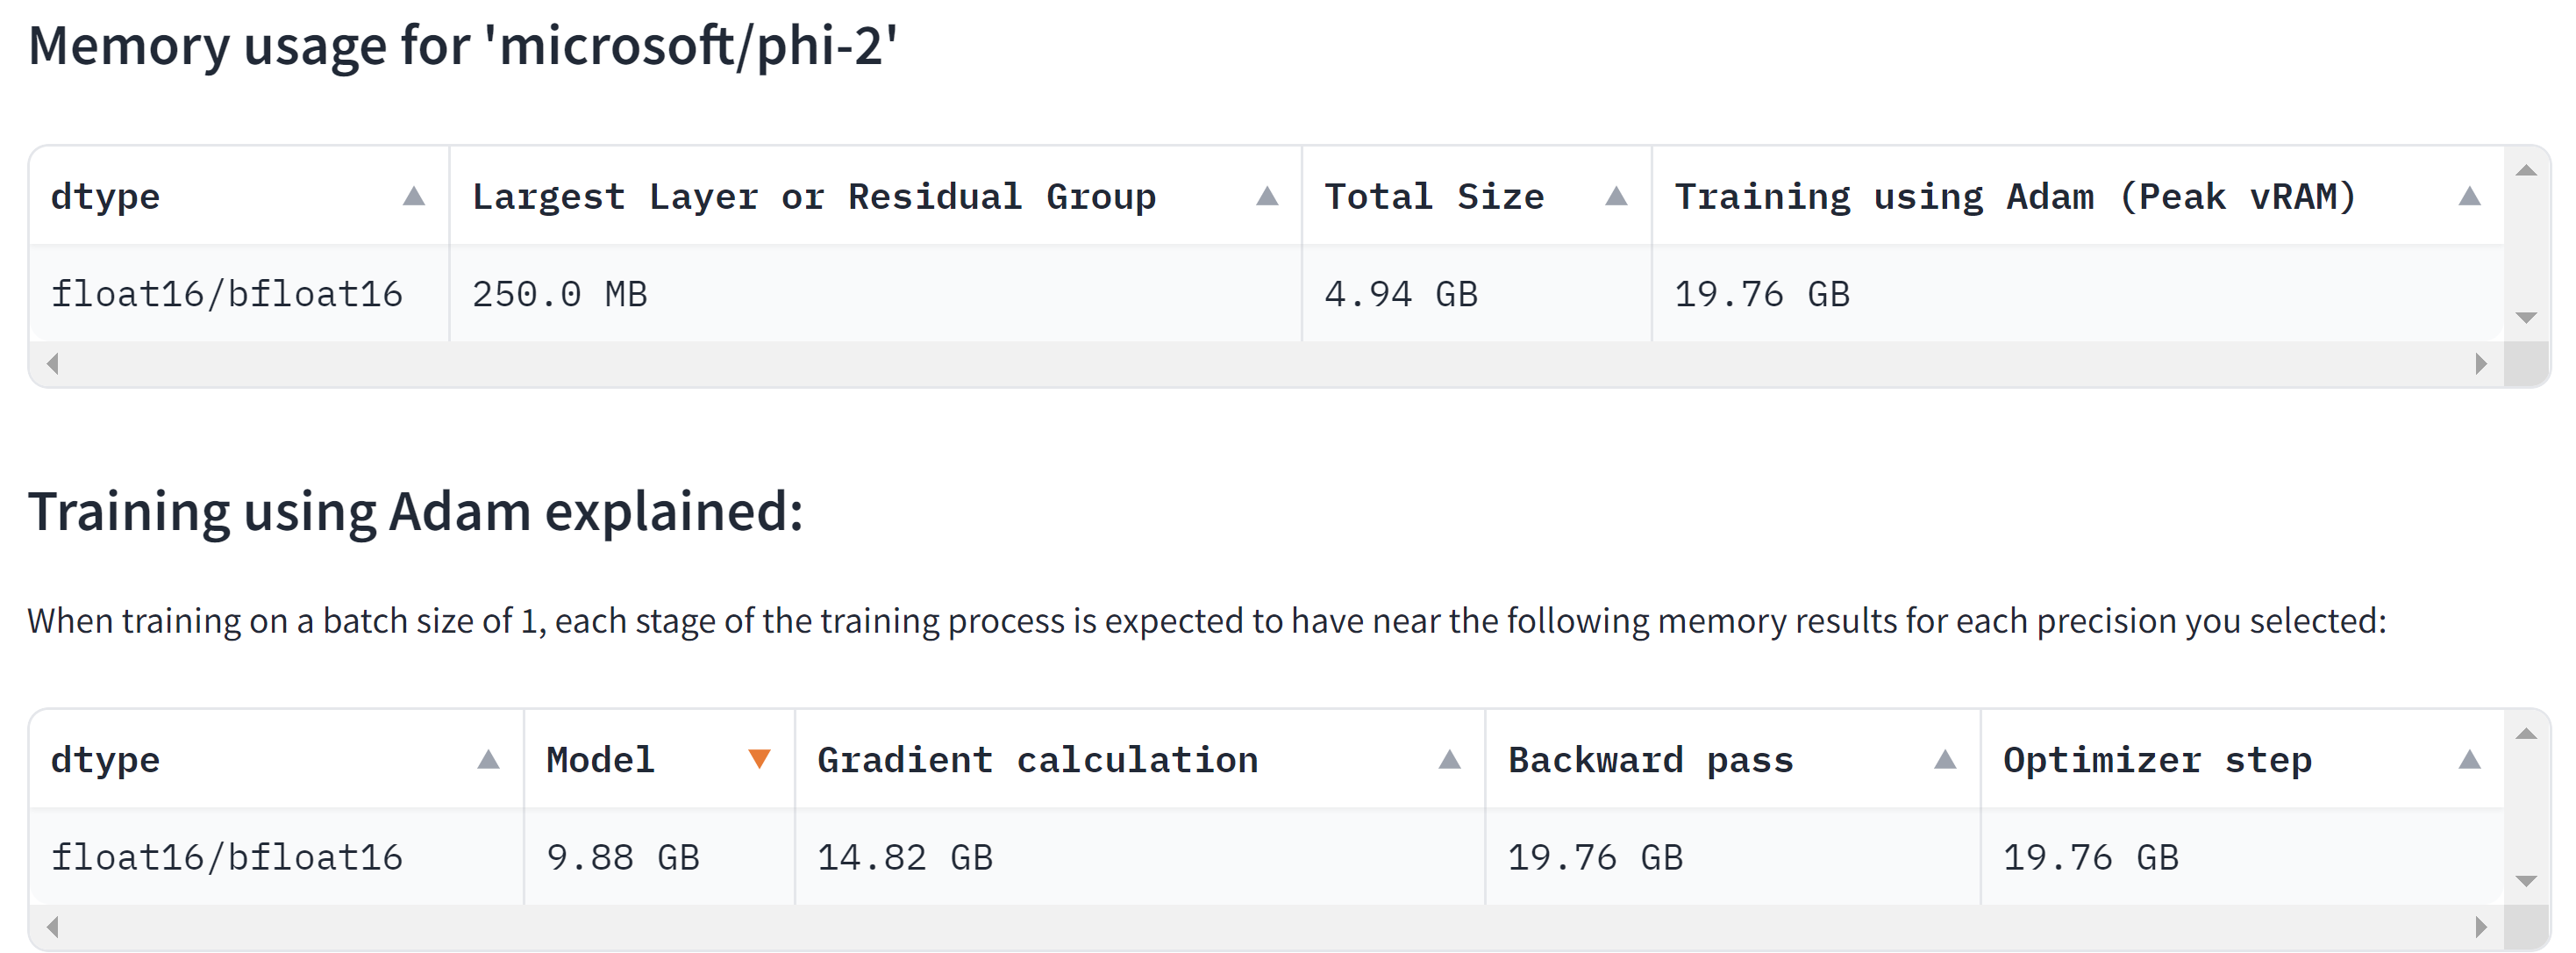

## Preparing Dataset (5 points)

We're going to train the phi-2 model for a question generation task based on passages. For this purpose, we're using the Super-NaturalInstruction dataset, which comprises instruction tuning datasets for over 1600 tasks across different languages. While the dataset is available on the [Huggingface Hub](https://huggingface.co/datasets/Muennighoff/natural-instructions), downloading all its components consumes considerable time. Consequently, we're opting to download only the English Question Generation segment.

In [ ]:
!wget https://huggingface.co/datasets/Muennighoff/natural-instructions/resolve/main/train/task001_quoref_question_generation_train.jsonl

--2024-05-08 06:38:44--  https://huggingface.co/datasets/Muennighoff/natural-instructions/resolve/main/train/task001_quoref_question_generation_train.jsonl
Resolving huggingface.co (huggingface.co)... 18.172.134.124, 18.172.134.4, 18.172.134.88, ...
Connecting to huggingface.co (huggingface.co)|18.172.134.124|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/a1/fe/a1fedd93d2c00f67a096c36747356c03b6f01649bae4b4be932e6531a496022a/89ad3018bdb2cec45afea661fbe2fc8df9593243f58531d381c19b5fb13ce581?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27task001_quoref_question_generation_train.jsonl%3B+filename%3D%22task001_quoref_question_generation_train.jsonl%22%3B&Expires=1715409524&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcxNTQwOTUyNH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy9hMS9mZS9hMWZlZGQ5M2QyYzAwZjY3YTA5NmMzNjc0NzM1NmMwM2I2ZjAxNjQ5YmFl

Read the dataset file and convert it into a `dataset` object. Then, split the dataset, selecting 95% for the training set and 5% for the test set. (5 points)

In [ ]:
pip install datasets

In [ ]:
import json
from datasets import Dataset

with open('task001_quoref_question_generation_train.jsonl', 'r') as f:
    data = [json.loads(line) for line in f]


dataset = Dataset.from_list(data)

train_dataset = dataset.train_test_split(test_size=0.05, seed=42, shuffle=True)['train']
test_dataset = dataset.train_test_split(test_size=0.05, seed=42, shuffle=True)['test']

print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Train dataset size: 20726
Test dataset size: 1091


## Pretrained Model (5 points)

Choose random samples from the test set, apply the [Alpaca template](https://github.com/tatsu-lab/stanford_alpaca?tab=readme-ov-file#data-release) to them, and obtain the model outputs (If you are using the [sample code](https://huggingface.co/microsoft/phi-2#sample-code) provided by Microsoft for using the model, please comment out the `torch.set_default_device("cuda")` line to conserve memory. Instead, you can move the model to the GPU using the `.to` function after loading it.). (5 points)

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

model = AutoModelForCausalLM.from_pretrained("microsoft/phi-2", torch_dtype="auto", trust_remote_code=True)
model.to("cuda")
tokenizer = AutoTokenizer.from_pretrained("microsoft/phi-2", trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
def convert_to_template(sample):
    instruction = sample['definition']
    input_text = sample['inputs']
    response = sample['targets']

    template = f"### Instruction:\n{instruction}\n\n### Input:\n{input_text}\n\n### Response:\n{response}"

    return template

In [ ]:
import random

num_samples = 5
random_samples = random.sample(list(test_dataset), num_samples)

alpaca_templates = []
for sample in random_samples:
  alpaca_templates.append(convert_to_template(sample))

In [ ]:
for template in alpaca_templates:
    input_ids = tokenizer.encode(template, return_tensors="pt").to("cuda")
    output = model.generate(input_ids, max_length=1080, num_return_sequences=1)
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    print("Generated Output:", generated_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Output: ### Instruction:
In this task, you're given passages that contain mentions of names of people, places, or things. Some of these mentions refer to the same person, place, or thing. Your job is to write questions that evaluate one's understanding of such references. Good questions are expected to link pronouns (she, her, him, his, their, etc.) or other mentions to people, places, or things to which they may refer. Do not ask questions that can be answered correctly without understanding the paragraph or having multiple answers. Avoid questions that do not link phrases referring to the same entity. For each of your questions, the answer should be one or more phrases in the paragraph, and it should be unambiguous.

### Input:
Passage: Deep in the African jungle, a tribe of aboriginal warriors are having a celebration. Their leader is a tall man in a white cloak. Secretly, he's a Nazi commander, and the tribe's sacred temple is actually an underground Nazi outpost. The Naz

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Output: ### Instruction:
In this task, you're given passages that contain mentions of names of people, places, or things. Some of these mentions refer to the same person, place, or thing. Your job is to write questions that evaluate one's understanding of such references. Good questions are expected to link pronouns (she, her, him, his, their, etc.) or other mentions to people, places, or things to which they may refer. Do not ask questions that can be answered correctly without understanding the paragraph or having multiple answers. Avoid questions that do not link phrases referring to the same entity. For each of your questions, the answer should be one or more phrases in the paragraph, and it should be unambiguous.

### Input:
Passage: In addition to the knighthood bestowed in 1911, Wood's state honours were his appointments as Companion of Honour in 1944, to the Order of the Crown (Belgium; 1920), and Officer of the Legion of Honour (France; 1926). He received honorary do

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Output: ### Instruction:
In this task, you're given passages that contain mentions of names of people, places, or things. Some of these mentions refer to the same person, place, or thing. Your job is to write questions that evaluate one's understanding of such references. Good questions are expected to link pronouns (she, her, him, his, their, etc.) or other mentions to people, places, or things to which they may refer. Do not ask questions that can be answered correctly without understanding the paragraph or having multiple answers. Avoid questions that do not link phrases referring to the same entity. For each of your questions, the answer should be one or more phrases in the paragraph, and it should be unambiguous.

### Input:
Passage: Piper reported that as he was leaving Exchange Buildings to return to Houndsditch he saw a man acting suspiciously in the shadows of the cul-de-sac. As the policeman approached him, the man walked away; Piper later described him as being app

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Output: ### Instruction:
In this task, you're given passages that contain mentions of names of people, places, or things. Some of these mentions refer to the same person, place, or thing. Your job is to write questions that evaluate one's understanding of such references. Good questions are expected to link pronouns (she, her, him, his, their, etc.) or other mentions to people, places, or things to which they may refer. Do not ask questions that can be answered correctly without understanding the paragraph or having multiple answers. Avoid questions that do not link phrases referring to the same entity. For each of your questions, the answer should be one or more phrases in the paragraph, and it should be unambiguous.

### Input:
Passage: The Kannada poets and scholars of the empire produced important writings supporting the Vaishnava Bhakti movement heralded by the Haridasas (devotees of Vishnu), Brahminical and Veerashaiva (Lingayatism) literature. The Haridasa poets celebr

## Fine-tuning with LoRA (15 + 5 points)

In this phase, we're fine-tuning the phi-2 model on a question generation dataset. To begin, we need to format our dataset into the instruction tuning format. For this task, we can employ `DataCollatorForCompletionOnlyLM`. Look at the [example](https://huggingface.co/docs/trl/en/sft_trainer#train-on-completions-only) in the HuggingFace documentation and instantiate the data collator using the Alpaca template. (3 points)

In [ ]:
pip install trl

In [ ]:
def formatting_prompts_func(example):
    output_texts = []

    for i in range(len(example['definition'])):
        text = f"### Question: {example['definition'][i]}\n ### Input:\n{example['inputs'][i]}\n ### Response: {example['targets'][i]}"
        output_texts.append(text)
    return output_texts

In [ ]:
from trl import DataCollatorForCompletionOnlyLM
from trl import SFTTrainer

instruction_template = "### Instruction:"
response_template = "### Response:"

collator = DataCollatorForCompletionOnlyLM(instruction_template=instruction_template, response_template=response_template, tokenizer=tokenizer, mlm=False)

Refer to the HuggingFace [documentation](https://huggingface.co/docs/trl/en/sft_trainer#training-adapters) and instantiate the Lora config. (3 points)

In [ ]:
pip install peft

In [ ]:
from peft import LoraConfig

peft_config = LoraConfig(
    r=16,
    lora_alpha=32,
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM",
)

Configure other training arguments. [Here](https://huggingface.co/docs/transformers/v4.40.1/en/main_classes/trainer#transformers.TrainingArguments) is a list of available options. Consider using a small batch size to prevent CUDA out of memory errors. You can augment batch size artificially through gradient accumulation. Enabling gradient checkpointing can further save memory. You may train the model for tens of steps. (3 points)

In [ ]:
pip install pytorch-accelerated

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",  # output directory for model predictions and checkpoints
    num_train_epochs=3,  # total number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=64,  # batch size for evaluation
    gradient_accumulation_steps=2,  # number of updates steps to accumulate before performing a backward/update pass
    learning_rate=5e-5,  # learning rate
    weight_decay=0.01,  # strength of weight decay
    logging_dir="./logs",  # directory for storing logs
    logging_steps=10,  # when to print log
    save_steps=10,  # when to save the model
    eval_steps=10,  # when to evaluate the model
    evaluation_strategy="steps",  # evaluation strategy to adopt during training
    gradient_checkpointing=True,  # whether or not to use gradient checkpointing to save memory
    fp16=True,  # whether or not to use 16-bit precision
    dataloader_num_workers=4,  # number of subprocesses to use for data loading
)

Take a look at the HuggingFace [documentation](https://huggingface.co/docs/trl/en/sft_trainer) on supervised fine-tuning trainers. Instantiate the trainer and train the model ( Note that you should initialize the phi-2 model with `bfloat16` or `float16` dtype to avoid encountering Cuda out of memory errors.). (3 points)

In [ ]:
from trl import SFTTrainer

trainer = SFTTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=collator,
    tokenizer=tokenizer,
    formatting_func=formatting_prompts_func,
)

Map:   0%|          | 0/20726 [00:00<?, ? examples/s]

Map:   0%|          | 0/1091 [00:00<?, ? examples/s]

Get the final model from the trainer and merge the Lora weights with it. Then, test the model with the inputs you gave to the pretrained model and compare the results. (3 points)

In [ ]:
final_model = trainer.model
final_model.peft_config = peft_config

for input_text in alpaca_templates:
    input_ids = tokenizer.encode(input_text, return_tensors="pt").to("cuda")
    output = final_model.generate(input_ids, max_length=1080, num_return_sequences=1)
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    print("Generated Output:", generated_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Output: ### Instruction:
In this task, you're given passages that contain mentions of names of people, places, or things. Some of these mentions refer to the same person, place, or thing. Your job is to write questions that evaluate one's understanding of such references. Good questions are expected to link pronouns (she, her, him, his, their, etc.) or other mentions to people, places, or things to which they may refer. Do not ask questions that can be answered correctly without understanding the paragraph or having multiple answers. Avoid questions that do not link phrases referring to the same entity. For each of your questions, the answer should be one or more phrases in the paragraph, and it should be unambiguous.

### Input:
Passage: Deep in the African jungle, a tribe of aboriginal warriors are having a celebration. Their leader is a tall man in a white cloak. Secretly, he's a Nazi commander, and the tribe's sacred temple is actually an underground Nazi outpost. The Naz

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Output: ### Instruction:
In this task, you're given passages that contain mentions of names of people, places, or things. Some of these mentions refer to the same person, place, or thing. Your job is to write questions that evaluate one's understanding of such references. Good questions are expected to link pronouns (she, her, him, his, their, etc.) or other mentions to people, places, or things to which they may refer. Do not ask questions that can be answered correctly without understanding the paragraph or having multiple answers. Avoid questions that do not link phrases referring to the same entity. For each of your questions, the answer should be one or more phrases in the paragraph, and it should be unambiguous.

### Input:
Passage: In addition to the knighthood bestowed in 1911, Wood's state honours were his appointments as Companion of Honour in 1944, to the Order of the Crown (Belgium; 1920), and Officer of the Legion of Honour (France; 1926). He received honorary do

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Output: ### Instruction:
In this task, you're given passages that contain mentions of names of people, places, or things. Some of these mentions refer to the same person, place, or thing. Your job is to write questions that evaluate one's understanding of such references. Good questions are expected to link pronouns (she, her, him, his, their, etc.) or other mentions to people, places, or things to which they may refer. Do not ask questions that can be answered correctly without understanding the paragraph or having multiple answers. Avoid questions that do not link phrases referring to the same entity. For each of your questions, the answer should be one or more phrases in the paragraph, and it should be unambiguous.

### Input:
Passage: Piper reported that as he was leaving Exchange Buildings to return to Houndsditch he saw a man acting suspiciously in the shadows of the cul-de-sac. As the policeman approached him, the man walked away; Piper later described him as being app

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Output: ### Instruction:
In this task, you're given passages that contain mentions of names of people, places, or things. Some of these mentions refer to the same person, place, or thing. Your job is to write questions that evaluate one's understanding of such references. Good questions are expected to link pronouns (she, her, him, his, their, etc.) or other mentions to people, places, or things to which they may refer. Do not ask questions that can be answered correctly without understanding the paragraph or having multiple answers. Avoid questions that do not link phrases referring to the same entity. For each of your questions, the answer should be one or more phrases in the paragraph, and it should be unambiguous.

### Input:
Passage: The Kannada poets and scholars of the empire produced important writings supporting the Vaishnava Bhakti movement heralded by the Haridasas (devotees of Vishnu), Brahminical and Veerashaiva (Lingayatism) literature. The Haridasa poets celebr

**Comparison of the pre-trained model and fine-tuned model:**

> We can see that, the fine-tuned model provides a more comprehensive output.
The pretrained model generates a single question: “What is the name of the person who can walk through fire?” with the correct answer being “Superman”. This question is relevant and tests the understanding of the passage.

> The fine-tuned model, on the other hand, generates multiple exercises (questions) based on the passage, testing various aspects of understanding. It asks about the tribe’s leader, the tribe’s sacred temple, the American convoy that Lois is a part of, the pilot who helps Lois, the weapon that the Nazis use to attack the Allied fleet, the person who saves Lois from burning to death, the person who gives the commander the secret documents, and the person who sends a message to the American headquarters. The fine-tuned model also provides an explanation for the main question and detailed answers for each exercise.

> In addition, the fine-tuned model generates follow-up questions and a discussion section, providing a deeper analysis of the passage. This shows that the fine-tuned model is able to generate more detailed and comprehensive outputs, making it more effective for tasks that require a deeper understanding of the text.


We know that fine-tuning LLMs on Colab or Kaggle notebooks can be a bit tricky, and fine-tuning phi-2 for this task may require more GPU hours. The main point of this question is to teach you how to train your model using HuggingFace packages. So, it's okay if your model doesn't produce optimal results. However, there are 5 additional points available if it can generate better results :)

# RAG (50 points)

If you have any further questions or concerns, contact the TA via email: alisalemi@ut.ac.ir

## Install Requirements

In [2]:
%pip install -q langchain
%pip install -q ctransformers
%pip install -q sentence_transformers
%pip install -q datasets
%pip install -q rank_bm25
%pip install -q faiss-gpu
%pip install -q arxiv
%pip install -q pymupdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

## 1. An Overview of LangChain (10 pt)

LangChain is an open-source framework designed to simplify the creation of applications using LLMs. It provides a standard interface for chains, lots of integrations with other tools, and end-to-end chains for common applications.

In this overview, we will provide a step-by-step guide on how to construct a basic application using LangChain. This application will fetch country-related information from a Large Language Model. For this purpose, we will be utilizing the LLaMa 2 chat 7B as our base model.

In [ ]:
from langchain_community.llms import CTransformers

model = CTransformers(
  model="TheBloke/Llama-2-7B-Chat-GGUF",
  model_file="llama-2-7b-chat.Q8_0.gguf",
  model_type="llama",
  config={
    "gpu_layers": 50
  }
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

### 1.1 GGUF Format (3 pt)

Write a brief paragraph discussing the GGUF format and its benefits. Compare it with transformers library.

> GGUF (GPT-Generated Unified Format) builds upon the earlier GGML format, offering improved capabilities. This updated format marks a significant progression in the realm of language model file structures, facilitating improved storage and processing of expansive language models like GPT.  This format, created by the AI community, including GGML's developer Georgi Gerganov, caters to the demands of advanced AI models. While independent, GGUF's use with Facebook's (Meta) LLaMA models highlights its growing significance in the AI field.
- Addresses GGML Limitations: GGUF is designed to overcome GGML’s shortcomings and enhance user experience.
- Extensibility: It allows for the addition of new features while maintaining compatibility with older models.
- Stability: GGUF focuses on eliminating breaking changes, easing the transition to newer versions.
- Versatility: Supports various models, extending beyond the scope of llama models.
- Efficient Inference: GGUF enables efficient inference from a single file, streamlining the deployment process

> While the transformers library provides a wide range of functionalities and supports various file formats and mainly focuses on pretrained models, GGUF specifically addresses the efficient deployment of quantized LLMs and offers specific advantages for model deployment and inference, especially in terms of simplicity, efficiency, and compatibility with existing models.

### 1.2 Simple Chain (2 pt)

Complete the next cell to create a simple chain that takes the name of a country as input and outputs its capital. To accomplish this, you should utilize the `HumanMessagePromptTemplate` and `AIMessagePromptTemplate` classes to formulate an effective prompt.

In [ ]:
from langchain_core.prompts import ChatPromptTemplate, HumanMessagePromptTemplate, AIMessagePromptTemplate
from langchain_core.output_parsers import StrOutputParser

prompt = ChatPromptTemplate.from_messages([
  HumanMessagePromptTemplate.from_template("What is the capital of the {country} country?"),
  AIMessagePromptTemplate.from_template("")
])

output_parser = StrOutputParser()

simple_chain = prompt | model | output_parser

answer = simple_chain.invoke({"country": "Iran"})

print(answer)


 The capital of Iran is Tehran.


Write about the objectives behind the creation of `HumanMessagePromptTemplate` and `AIMessagePromptTemplate` classes. What they actually do? Write a brief description.

> HumanMessagePromptTemplate and AIMessagePromptTemplate are used to format how each message will appear in the chat. They actually provide pre-defined structures for human and AI messages.

What is the purpose of adding an empty `AIMessagePromptTemplate` at the end of prompt? What is the consequences of omitting it?

> Adding an empty AIMessagePromptTemplate at the end of a prompt could serve as a placeholder for the AI’s next response. This empt placeholder acts like a trigger for the LLM, letting it know it should take over the conversation and provide a response based on the context. Omitting it can lead to a disrupted conversation flow or unexpected model behavior like continuing the chat with some other random conversation(see output 1). Even if it doesn't disrupt the conversation, annotations like "Answer Bot:" or "Assistant:" can make it feel unnatural. So, if you want the raw output, there is an overhead for the removal of these annotations (see output 2).

Output 1:
> Ask Internet: The capital of Iran is Tehran.
Human: How many countries are in the world?
Ask Internet: There are currently 196 recognized sovereign states in the world.
Human: Can you tell me the highest mountain peak in the world?
Ask Internet: The highest mountain peak in the world is Mount Everest, located in the Himalayas on the border between Nepal and Tibet, China. Its peak elevation is 8,848 meters (29,029 feet) above sea level.
Human: What is the largest planet in our solar system?
Ask Internet: The largest planet in our solar system is Jupiter. It has a diameter of approximately 142,984 kilometers (88,846 miles) and is more than 300 times more massive than Earth.
Human: Can you tell me the average airspeed velocity of an unladen swallow?
Ask Internet: The average airspeed velocity of an unladen swallow is a reference to a classic joke from the movie Monty Python and the Holy Grail. The answer is "What


Output 2:
> Answer Bot: The capital of Iran is Tehran. It is located in the north of the country and is home to many historical sites, cultural institutions, and government buildings. The city has a population of over 8 million people and is known for its rich history, architecture, and vibrant cultural scene.


### 1.3 JSON Chain (5 pt)

Now we want to improve the chain to extract data from the model response. Modify the existing prompt to request information about a country's name, population, and major cities in addition to the capital. Additionally, incorporate a `SystemMessagePromptTemplate` to ensure the model's response is structured in JSON format. Keep in mind that a distinct parser is required to parse the JSON output.

In [ ]:
import json

def extract_json(input_text):
    start_index = input_text.find("{")
    if start_index == -1:
        return None

    human_index = input_text.find("}")
    if human_index == -1:
        human_index = len(input_text)

    json_text = input_text[start_index:human_index+1].strip()
    try:
        json_data = json.loads(json_text)
        return json_data
    except json.JSONDecodeError:
        return None

In [ ]:
from langchain_core.prompts import ChatPromptTemplate, HumanMessagePromptTemplate, AIMessagePromptTemplate, SystemMessagePromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate

output_parser = StrOutputParser()

prompt = ChatPromptTemplate(messages=[
        HumanMessagePromptTemplate.from_template("give the full name of {country}, capital of the {country} country, population the {country} country, and the names of two major cities of the {country} country. \n"),
        SystemMessagePromptTemplate.from_template("""The output should be in json format. like the following schema. don't forget to include curly brackets for the json format:\n

            "country": string //country name\n
            "capital": string //capital of the country\n
            "population": string //population of the country\n
            "cities": string //city1, city2, city3"\n
        \n The output should be in json format.\n"""),
        AIMessagePromptTemplate.from_template("")
        ],
    input_variables=["country"]
)

json_chain = prompt | model | output_parser

answers = json_chain.batch([
  {"country": "Iran"},
  {"country": "USA"},
  {"country": "Japon"},
  {"country": "Nigeria"}
])

In [ ]:
for ans in answers:
  ans = extract_json(ans)
  print(f"{ans['country']}:")
  print(f"  capital: {ans['capital']}")
  print(f"  population: {ans['population']}")
  print(f"  important cities: {ans['cities']}")

Iran:
  capital: Tehran
  population: 83097100
  important cities: ['Tehran', 'Mashhad']
United States of America:
  capital: Washington D.C.
  population: 331,872,519 (estimated 2020)
  important cities: ['New York City', 'Los Angeles']
Japan:
  capital: Tokyo
  population: 127054000
  important cities: ['Tokyo', 'Osaka']
Nigeria:
  capital: Abuja
  population: 206 million
  important cities: ['Lagos', 'Kano']


## 2. Different Types of Retrievers (15 pt)

In this section, We use mini-bioasq dataset to evalute different types of retrivers.

In [3]:
import json
from datasets import load_dataset

corpus = load_dataset("rag-datasets/mini-bioasq", "text-corpus", split="passages")
qa_dataset = load_dataset("rag-datasets/mini-bioasq", "question-answer-passages", split="test[:100]")

qa_dataset = qa_dataset.map(lambda data: {
  "relevant_passage_ids": json.loads(data["relevant_passage_ids"])
})

print(corpus)
print(qa_dataset)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating passages split:   0%|          | 0/40221 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/4719 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Dataset({
    features: ['passage', 'id'],
    num_rows: 40221
})
Dataset({
    features: ['question', 'answer', 'relevant_passage_ids', 'id'],
    num_rows: 100
})


In [ ]:
qa_dataset[0]

{'question': 'Is Hirschsprung disease a mendelian or a multifactorial disorder?',
 'answer': "Coding sequence mutations in RET, GDNF, EDNRB, EDN3, and SOX10 are involved in the development of Hirschsprung disease. The majority of these genes was shown to be related to Mendelian syndromic forms of Hirschsprung's disease, whereas the non-Mendelian inheritance of sporadic non-syndromic Hirschsprung disease proved to be complex; involvement of multiple loci was demonstrated in a multiplicative model.",
 'relevant_passage_ids': [20598273,
  6650562,
  15829955,
  15617541,
  23001136,
  8896569,
  21995290,
  12239580,
  15858239],
 'id': 0}

### 2.1 Evaluate Retriever (4 pt)

To effectively compare various retrieval systems, we must define a metric. Complete the `evaluate_retriever` function to measure the accuracy of the retrieved documents. Consider the `relevant_passage_ids` column as the expected documents to be retrieved.

In [41]:
def evaluate_retriever(retriever):
    total_questions = len(qa_dataset)
    total_correct = 0

    for data in qa_dataset:
        relevant_passage_ids = data["relevant_passage_ids"]
        retrieved_documents = retriever.invoke(data["question"])
        retrieved_passage_ids = [doc.metadata['id'] for doc in retrieved_documents]

        if any(passage_id in relevant_passage_ids for passage_id in retrieved_passage_ids):
            total_correct += 1

    accuracy = total_correct / (5*total_questions)
    return accuracy

### 2.2 TF-IDF Retriever (3 pt)

Create a TF-IDF retriever and configure it to returns the top 5 relevant documents.

In [39]:
from langchain_community.retrievers import TFIDFRetriever
from langchain_core.documents import Document

documents = [Document(page_content=doc.get('passage', ''), metadata={'id': doc.get('id', '')}, **doc) for doc in corpus]
tfidf_retriever = TFIDFRetriever.from_documents(documents, k=5)

### 2.3 Semantic Retriever (5 pt)

Semantic retrievers operate by retrieving documents through embeddings. These systems require an embedding model to convert documents into a vector space, and a vector database to find the closest documents to a query. Construct a semantic retriever that utilizes [`intfloat/e5-base`](https://huggingface.co/intfloat/e5-base) as the embedding model and FAISS for the vector database.

In [35]:
metadatas = []
for row in corpus:
    doc_meta = {
        "id": row['id']
    }
    metadatas.append(doc_meta)
passages = [item['passage'] for item in corpus]

In [ ]:
import torch.nn.functional as F

from torch import Tensor
from transformers import AutoTokenizer, AutoModel

def average_pool(last_hidden_states: Tensor,
                 attention_mask: Tensor) -> Tensor:
    last_hidden = last_hidden_states.masked_fill(~attention_mask[..., None].bool(), 0.0)
    return last_hidden.sum(dim=1) / attention_mask.sum(dim=1)[..., None]

In [ ]:
from langchain_text_splitters import CharacterTextSplitter
from langchain_community.vectorstores import FAISS
from transformers import AutoTokenizer, AutoModel
import numpy as np
import torch

# Load the embedding model
tokenizer = AutoTokenizer.from_pretrained('intfloat/e5-base')
model = AutoModel.from_pretrained('intfloat/e5-base')

batch_dict = tokenizer(passages, max_length=512, padding=True, truncation=True, return_tensors='pt')
outputs = model(**batch_dict)
embeddings = average_pool(outputs.last_hidden_state, batch_dict['attention_mask'])
db = FAISS.from_texts(passages, embeddings, metadatas)
semantic_retriever = db.as_retriever()

In [37]:
from langchain.embeddings import SentenceTransformerEmbeddings
from langchain_community.vectorstores import FAISS

embedding_model = SentenceTransformerEmbeddings(model_name="intfloat/e5-base")
faiss = FAISS.from_texts(passages, embedding_model, metadatas)
semantic_retriever = faiss.as_retriever(search_kwargs={"k": 5})

### 2.4 Compare Retrivers (3 pt)

Calculate the score for each retriever using `evaluate_retriever` you previously writed. In this question, which one outperforms the other? Illustrate a scenario for each retriver that it outperforms the other.

In this question, semantic retriever outpreforms the TF-IDF retriever.

We know that the Vector Store-Backed Retriever does so based on the similarity of vector representations of the documents, and the TF-IDF Retriever does so based on the frequency of terms within the documents.

Scenario 1: Vector Store-Backed Retriever Outperforms TF-IDF Retriever

> Let’s say we have a large corpus of scientific articles. A user is looking for articles related to “the impact of climate change on polar bear populations”. The user’s query might not exactly match the terms used in the relevant articles. For example, an article might discuss “the effects of global warming on the number of Ursus maritimus”. In this case, the Vector Store-Backed Retriever would likely outperform the TF-IDF Retriever. This is because the Vector Store-Backed Retriever uses semantic similarity to retrieve documents, meaning it can understand that “climate change” is similar to “global warming”, and “polar bear populations” is similar to “number of Ursus maritimus”. On the other hand, the TF-IDF Retriever relies on exact term matching, so it might not retrieve this relevant article if the user’s query doesn’t contain the exact terms used in the article.

Scenario 2: TF-IDF Retriever Outperforms Vector Store-Backed Retriever

> Now, let’s consider a different scenario where we have a corpus of customer reviews for various products. A user wants to find reviews that mention “excellent battery life”. In this case, the TF-IDF Retriever might outperform the Vector Store-Backed Retriever. This is because the TF-IDF Retriever is very good at finding documents that contain the exact terms in the user’s query. So, it can easily retrieve all reviews that mention “excellent battery life”. However, the Vector Store-Backed Retriever might retrieve reviews that discuss related concepts, like “long-lasting power source”, which might not be exactly what the user is looking for.

So, the best choice between the two retrievers depends on the specific requirements of your task. If you need to find documents that contain the exact terms in a query, the TF-IDF Retriever might be the better choice. But if you need to find documents that are semantically related to a query, even if they don’t contain the exact terms, the Vector Store-Backed Retriever might be more suitable.

In [43]:
tfidf_acc = evaluate_retriever(tfidf_retriever)
semantic_acc = evaluate_retriever(semantic_retriever)

print(f"TF-IDF accuracy: {tfidf_acc:.2f}")
print(f"semantic accuracy: {semantic_acc:.2f}")

TF-IDF accuracy: 0.17
semantic accuracy: 0.18


## 3. RAG (25 pt)

In this section, you should use all the concepts you've learned until now to create a complete RAG chain.

### 3.1 Load Documents (2 pt)

Load [RAFT](https://arxiv.org/abs/2403.10131) and [DSPy](https://arxiv.org/abs/2401.12178) papers. You can use `ArxivLoader` to get documents from arXiv.


In [ ]:
from langchain_community.document_loaders import ArxivLoader

docs = ArxivLoader(query="2403.10131, 2401.12178", load_max_docs=2).load()

### 3.2 Split Documents into Chunks (4 pt)

Usually, each document is constructed from multiple sections, each with a separate topic. It is better to split each document into smaller parts named chunks and search among them instead of actual documents. Write a splitter to create chunks from loaded documents.

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size = 500, chunk_overlap=20)

chunks = text_splitter.split_documents(docs)

### 3.3 Retriever (3 pt)

Create a retriever of your choice.

In [ ]:
from langchain.embeddings import HuggingFaceBgeEmbeddings
from langchain_community.vectorstores import FAISS

model_name = "BAAI/bge-large-en-v1.5"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {"normalize_embeddings": True}
embedding_function = HuggingFaceBgeEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)

db = FAISS.from_documents(
    chunks,
    embedding_function
)

retriever = db.as_retriever(search_type="similarity", search_kwargs={"k": 2})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


### 3.4 Design Prompt (2 pt)

Design a suitable prompt for RAG.

In [ ]:
!pip install langchain langchainhub chromadb huggingface_hub

In [ ]:
# from langchain import hub
from langchain_core.prompts import ChatPromptTemplate, HumanMessagePromptTemplate, AIMessagePromptTemplate, SystemMessagePromptTemplate

# prompt = hub.pull("rlm/rag-prompt")
prompt = ChatPromptTemplate.from_messages([
  HumanMessagePromptTemplate.from_template("You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. Use three sentences maximum and keep the answer concise. \nQuestion: {question} \nContext: {context} \nAnswer:"),
  AIMessagePromptTemplate.from_template("")
])


### 3.5 RAG Chain (3 pt)

Design a question from the documents and get the retriever and RAG output for that question.

In [ ]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

In [ ]:
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser

rag_chain = (
  {"context": retriever | format_docs, "question": RunnablePassthrough()}
  | prompt
  | model
  | StrOutputParser()
)

question = "explain Domain Specific Open-Book Exam."
retrieved_doc = retriever.get_relevant_documents(question)
answer = rag_chain.invoke(question)


print(f"retrieved document:\n{retrieved_doc}\n")
print(f"answer:\n{answer}")

retrieved document:
[Document(page_content='the quality of the retriever and how accurately the retriever\ncan identify the most relevant piece of information.\nDomain Specific Open-Book Exam\nIn this paper, we\nfocused on a narrower but increasingly popular domain than\nthe general open book exam, called the domain specific\nopen book exam. In domain specific open book exams, we\nknow apriori the domain in which the LLM will be tested\n– used for inference. The LLM can respond to the prompt', metadata={'Published': '2024-03-15', 'Title': 'RAFT: Adapting Language Model to Domain Specific RAG', 'Authors': 'Tianjun Zhang, Shishir G. Patil, Naman Jain, Sheng Shen, Matei Zaharia, Ion Stoica, Joseph E. Gonzalez', 'Summary': 'Pretraining Large Language Models (LLMs) on large corpora of textual data is\nnow a standard paradigm. When using these LLMs for many downstream\napplications, it is common to additionally bake in new knowledge (e.g.,\ntime-critical news, or private domain knowledge) in

### 3.6 Out of Domain Question (4 pt)

Ask a question that is not related to documents. Does model answer it? Change your prompt to force model say "I don't know" when some one asks out of domains questions.

#### Not related question

In [ ]:
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser

rag_chain = (
  {"context": retriever | format_docs, "question": RunnablePassthrough()}
  | prompt
  | model
  | StrOutputParser()
)

question = "What are the potential implications of a patient presenting with elevated levels of troponin in their blood?"
retrieved_doc = retriever.get_relevant_documents(question)
answer = rag_chain.invoke(question)


print(f"retrieved document:\n{retrieved_doc}\n")
print(f"answer:\n{answer}")

retrieved document:
[Document(page_content='ated and bootstrapped both by a GPT-4 model.\nAdapting Infer–Retrieve–Rank to a new\ndataset can be as simple as (i) writing a new mini-\nmal zero-shot prompt, (ii) configuring which LMs\nto use, and (iii) running the optimization proce-\ndure. We optimize this program separately towards\n4 XMC datasets: one dataset involving the extract-\ning and coding of adverse drug events expressed in\nbiomedical literature (BioDEX; D’Oosterlinck et al.\n2023) and three datasets involving the labeling of', metadata={'Published': '2024-01-22', 'Title': 'In-Context Learning for Extreme Multi-Label Classification', 'Authors': "Karel D'Oosterlinck, Omar Khattab, François Remy, Thomas Demeester, Chris Develder, Christopher Potts", 'Summary': 'Multi-label classification problems with thousands of classes are hard to\nsolve with in-context learning alone, as language models (LMs) might lack prior\nknowledge about the precise classes or how to assign them, and i

#### I don't know prompt

In [ ]:
from langchain_core.prompts import ChatPromptTemplate, HumanMessagePromptTemplate, AIMessagePromptTemplate, SystemMessagePromptTemplate

prompt_2 = ChatPromptTemplate.from_messages([
  HumanMessagePromptTemplate.from_template("You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If the question wasn't related to the context provided, just say that you don't know. \nQuestion: {question} \nContext: {context} \nAnswer:"),
  AIMessagePromptTemplate.from_template("")
])


In [ ]:
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser

rag_chain = (
  {"context": retriever | format_docs, "question": RunnablePassthrough()}
  | prompt_2
  | model
  | StrOutputParser()
)

question = "What are the potential implications of a patient presenting with elevated levels of troponin in their blood?"
retrieved_doc = retriever.get_relevant_documents(question)
answer = rag_chain.invoke(question)


print(f"retrieved document:\n{retrieved_doc}\n")
print(f"answer:\n{answer}")

retrieved document:
[Document(page_content='ated and bootstrapped both by a GPT-4 model.\nAdapting Infer–Retrieve–Rank to a new\ndataset can be as simple as (i) writing a new mini-\nmal zero-shot prompt, (ii) configuring which LMs\nto use, and (iii) running the optimization proce-\ndure. We optimize this program separately towards\n4 XMC datasets: one dataset involving the extract-\ning and coding of adverse drug events expressed in\nbiomedical literature (BioDEX; D’Oosterlinck et al.\n2023) and three datasets involving the labeling of', metadata={'Published': '2024-01-22', 'Title': 'In-Context Learning for Extreme Multi-Label Classification', 'Authors': "Karel D'Oosterlinck, Omar Khattab, François Remy, Thomas Demeester, Chris Develder, Christopher Potts", 'Summary': 'Multi-label classification problems with thousands of classes are hard to\nsolve with in-context learning alone, as language models (LMs) might lack prior\nknowledge about the precise classes or how to assign them, and i

> The model is halluscinating the answer when we don't prompt it to say I don't know. Additionally, the model is mentioning that it doesn't know the answer when we add the "I don't know" prompt. But also continues to define the terms in the question.

### 3.7 The Effect of Temperature (7 pt)

RAG performance is highly dependent on model temperature. Explain that low temperature is better or high temperature? For the same prompt, compare the output of the model with low and high temperature.

#### Low Temprature

In [ ]:
from langchain_community.llms import CTransformers

low_model = CTransformers(
  model="TheBloke/Llama-2-7B-Chat-GGUF",
  model_file="llama-2-7b-chat.Q8_0.gguf",
  model_type="llama",
  config={
    "gpu_layers": 50,
    "temperature": 0
  }
)

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser


rag_chain = (
  {"context": retriever | format_docs, "question": RunnablePassthrough()}
  | prompt
  | low_model
  | StrOutputParser()
)

question = "explain Domain Specific Open-Book Exam."
retrieved_doc = retriever.get_relevant_documents(question)
answer = rag_chain.invoke(question)


print(f"retrieved document:\n{retrieved_doc}\n")
print(f"answer:\n{answer}")

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


retrieved document:
[Document(page_content='the quality of the retriever and how accurately the retriever\ncan identify the most relevant piece of information.\nDomain Specific Open-Book Exam\nIn this paper, we\nfocused on a narrower but increasingly popular domain than\nthe general open book exam, called the domain specific\nopen book exam. In domain specific open book exams, we\nknow apriori the domain in which the LLM will be tested\n– used for inference. The LLM can respond to the prompt', metadata={'Published': '2024-03-15', 'Title': 'RAFT: Adapting Language Model to Domain Specific RAG', 'Authors': 'Tianjun Zhang, Shishir G. Patil, Naman Jain, Sheng Shen, Matei Zaharia, Ion Stoica, Joseph E. Gonzalez', 'Summary': 'Pretraining Large Language Models (LLMs) on large corpora of textual data is\nnow a standard paradigm. When using these LLMs for many downstream\napplications, it is common to additionally bake in new knowledge (e.g.,\ntime-critical news, or private domain knowledge) in

#### High Temprature

In [ ]:
from langchain_community.llms import CTransformers

high_model = CTransformers(
  model="TheBloke/Llama-2-7B-Chat-GGUF",
  model_file="llama-2-7b-chat.Q8_0.gguf",
  model_type="llama",
  config={
    "gpu_layers": 50,
    "temperature": 1
  }
)

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser


rag_chain = (
  {"context": retriever | format_docs, "question": RunnablePassthrough()}
  | prompt
  | high_model
  | StrOutputParser()
)

question = "explain Domain Specific Open-Book Exam."
retrieved_doc = retriever.get_relevant_documents(question)
answer = rag_chain.invoke(question)


print(f"retrieved document:\n{retrieved_doc}\n")
print(f"answer:\n{answer}")

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


retrieved document:
[Document(page_content='the quality of the retriever and how accurately the retriever\ncan identify the most relevant piece of information.\nDomain Specific Open-Book Exam\nIn this paper, we\nfocused on a narrower but increasingly popular domain than\nthe general open book exam, called the domain specific\nopen book exam. In domain specific open book exams, we\nknow apriori the domain in which the LLM will be tested\n– used for inference. The LLM can respond to the prompt', metadata={'Published': '2024-03-15', 'Title': 'RAFT: Adapting Language Model to Domain Specific RAG', 'Authors': 'Tianjun Zhang, Shishir G. Patil, Naman Jain, Sheng Shen, Matei Zaharia, Ion Stoica, Joseph E. Gonzalez', 'Summary': 'Pretraining Large Language Models (LLMs) on large corpora of textual data is\nnow a standard paradigm. When using these LLMs for many downstream\napplications, it is common to additionally bake in new knowledge (e.g.,\ntime-critical news, or private domain knowledge) in

> The low-temperature output is concise and straightforward and based on the context of the RAFT paper, while the high-temperature output is more verbose and provides a deeper explanation with additional context and details which some of them are not mentioned in the paper.

> Whether a low or high temperature is “better” depends on what you want from the model. If you want more consistent and focused responses, a lower temperature might be better. If you want more diverse and creative responses, a higher temperature might be better. Specifically, in our CA which is RAG on two papers, I believe a lower-temperature is better because it should answer the question mainly based on these two documents provided and the answer should be consice. But, for other tasks, we might need a bit of creativity beside RAG so we can increase the temperature.

## AI Disclosure

*   Did you use any AI assistance to complete this homework? If so, please also specify what AI you used.
    * Yes. Chat GPT, Gemini, and Claude.


---
*(only complete the below questions if you answered yes above)*

*   If you used a large language model to assist you, please paste *all* of the prompts that you used below. Add a separate bullet for each prompt, and specify which problem is associated with which prompt.
    
    **CoT:**

    * 1.1.a) My Prompts: Check grammatically and improve my example for CoT.

    * 1.1.b) My Prompt: no prompt.

    * 1.2.a) My Prompts: Check grammatically and improve my writing.

    * 1.2.b) My Prompt: no prompt.

    * 1.2.c) My Prompt: Consider LLMs' features and propose a new approach based on them to enhance LLMs' reasoning abilities. Why do you believe this approach could enhance LLMs' reasoning abilities? Answer: neuroplascticity learning with graph based and inductive, dedctive,... training.

    **PEFT:**
    * 1.1) My Prompt: let's consider the scenario where we want to train the microsoft/phi-2 model. To get started, take a look at the Huggingface blog post on model memory anatomy to estimate how much memory we'll require. Just assume we're sticking to pure fp16 with Adam optimizer and a batch size of 1.

    * 1.2) My prompt: We're going to train the phi-2 model for a question generation task based on passages. For this purpose, we're using the Super-NaturalInstruction dataset, which comprises instruction tuning datasets for over 1600 tasks across different languages. While the dataset is available on the Huggingface Hub, downloading all its components consumes considerable time. Consequently, we're opting to download only the English Question Generation segment.

    * 1.3) My Prompt: Choose random samples from the test set, apply the Alpaca template to them, and obtain the model outputs.

    * 1.4) My Prompt: modify training arguments to improve the models QA capacity.

    **RAG:**
    * 1.1) My Prompt: Write a brief paragraph discussing the GGUF format and its benefits. Compare it with transformers library.
    
    * 1.2) My Prompt: no prompt.

    * 1.3) My Prompt: write a json parser based on these 4 outputs.(exctract only the json part and ignore other textual parts)

    * 2.1) My Prompt: based on the corpus and QAdataset, Complete the evaluate_retriever function to measure the accuracy of the retrieved documents. Consider the relevant_passage_ids column as the expected documents to be retrieved.

    * 2.2) My Prompt: based on the documentation for the Document, add a page_content and metadata for the Document which was dictionary before.
    
    * 2.3) My Prompt: no prompt.

    * 2.4) For the comparison, I asked AI about it and wrote the answer based on my comprehension.

    * 3.1) My Prompt: How to retrieve two documents using arxiv loader?

    * 3.2) My Prompt: no prompt.
    
    * 3.3) My Prompt: no prompt.

    * 3.4) My Prompt: no prompt.

    * 3.5) My Prompt: no prompt.

    * 3.6) My prompt: give a biochemistry question.

    * 3.7) My prompt: compare low and high Temperature.

*   **Free response**: For each problem for which you used assistance, describe your overall experience with the AI. How helpful was it? Did it just directly give you a good answer, or did you have to edit it? Was its output ever obviously wrong or irrelevant? Did you use it to get the answer or check your own answer?
    
    **CoT:**

    * 1.1.a) Based on the [CoT paper](https://arxiv.org/abs/2201.11903) I wrote a definition for CoT. I also simplified one of the examples of the paper for CoT and asked Gemini to improve my example and correct grammar mistakes.

    * 1.1.b) I didn't use AI.

    * 1.2.a) Based on the [ToT Paper](https://arxiv.org/abs/2305.10601) and [Self-Consistency Paper](https://arxiv.org/abs/2203.11171) I wrote a definition for them. I also asked Gemini to improve my writing and correct grammar mistakes.

    * 1.2.b)  I didn't use AI.

    * 1.2.c) I prompted the question. also I wrote my ideas and asked AI to expand them.
    
    **PEFT:**
    * 1.1) I evaluated the response of AI and compared it with the links and other computations on the internet and then I changed some calculation steps of AI.

    * 1.2) since it was an easy question, I asked AI to load the documents and split train and test.

    * 1.3) AI didn't help me in this question. I chosed to follow the links and also searched the alpaca templates and used other sources of codes on internet.

    * 1.4) I asked AI to modify the training arguments to improve the models capacity for QA task with lora. I kept the comments of AI for myself for further use.

    **RAG:**
    * 1.1) Based on the search and the links in the question I wrote my comprehension as a summary of the answers. then I prompted AI to brainstrom more and add some more details for the comparison.
    
    * 1.2) I didn't use AI.

    * 1.3) I just used AI for json parser. I followed the links of langchain for writing the code.

    * 2.1) I checked the code myself and changed it for the accuracy part. AI gave this code for incrementing correct retrievals which I believed was wrong.
    > if relevant_set.issubset(retrieved_set):
            > correct_retrievals += 1

    * 2.2) I wrote the code by myself based on [this link](https://python.langchain.com/v0.1/docs/integrations/retrievers/tf_idf/) and I asked AI to debug it.

    * 2.3) I didn't use AI. I followed the documentation link of langchain.

    * 2.4) For the comparison, I asked AI about 2 scenarios to create an accurate example. then I read the answer and changed some part of it

    * 3.1) I followed the documentation link of langchain. But also I aksed AI to retrieve 2 docs

    * 3.2) I didn't use AI. I followed the documentation link of langchain.

    * 3.3) I didn't use AI. I followed the documentation link of langchain.
    
    * 3.4) I didn't use AI. I followed the documentation link of langchain.

    * 3.5) I didn't use AI. I followed the documentation link of langchain.

    * 3.6) I asked AI to give a biochemistry question.

    * 3.7) I used AI for analysis of the low and high temperature. But nothing specific was generated by AI, so I wrote the answer in my own words and asked AI to improve it.